In [27]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv('summary.csv')

In [29]:
df.at[0, 'unroll'] = 1
baseline = df.iloc[0]
print(baseline)

status                             ok
unroll                              1
bench          baseline:gemm-baseline
bram_used                          44
dsp_used                            3
lut_used                         1535
lutmem_used                       137
reg_used                         2642
uram_used                           0
runtime_avg                   10.4164
runtime_std                0.00853253
Name: 0, dtype: object


In [30]:
info_keys = [ 
    'unroll',
]
keys = [
    'bram_used',
    'dsp_used',
    'reg_used',
    'runtime_avg',
]

In [31]:
normalized_df = df.copy()
for key in keys:
    norm_val = baseline[key]
    normalized_df[key] = normalized_df[key].apply(lambda v: v / norm_val)
normalized_df = normalized_df[info_keys + keys]
print(normalized_df)

    unroll  bram_used  dsp_used  reg_used  runtime_avg
0      1.0   1.000000       1.0  1.000000     1.000000
1      4.0   1.113636       4.0  1.065481     0.654566
2      5.0   1.113636       5.0  1.073051     0.722585
3     14.0   1.113636      14.0  1.356548     0.653502
4     15.0   1.113636      11.0  1.326646     0.678971
5     16.0   1.113636      16.0  1.459122     0.653438
6      6.0   1.113636       6.0  1.132097     0.653110
7      7.0   1.113636       7.0  1.109008     0.702938
8      8.0   1.113636       8.0  1.150643     0.654538
9      9.0   1.113636       9.0  1.238077     0.697819
10    10.0   1.113636      10.0  1.263058     0.647229
11    11.0   1.113636      11.0  1.306964     0.685866
12    12.0   1.113636      12.0  1.339137     0.653405
13    13.0   1.113636      13.0  1.338380     0.678819


In [32]:
long = pd.melt(normalized_df, id_vars=['unroll'], var_name='metrics', value_name='values')
long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
unroll     56 non-null float64
metrics    56 non-null object
values     56 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


Text(0, 0.5, 'Unrolling Factor')

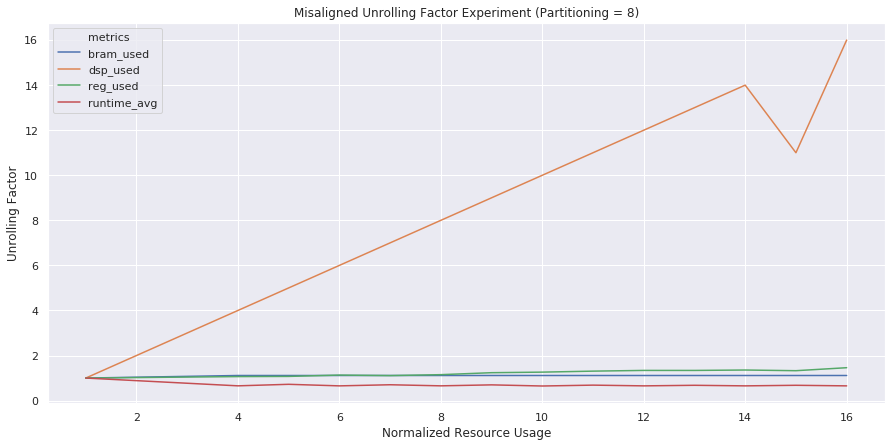

In [33]:
plt.figure(figsize=(15, 7))
plot = sns.lineplot(x='unroll', y='values', hue='metrics', data=long)
plot.set_title('Misaligned Unrolling Factor Experiment (Partitioning = 8)')
plot.set_xlabel('Normalized Resource Usage')
plot.set_ylabel('Unrolling Factor')

In [34]:
plot.figure.savefig('normalized_resources.png', dpi=300)

Text(0.5, 0.07, 'Misalgined Unrolling (Partitioning = 8) - Absolute Resource Usages')

<Figure size 432x288 with 0 Axes>

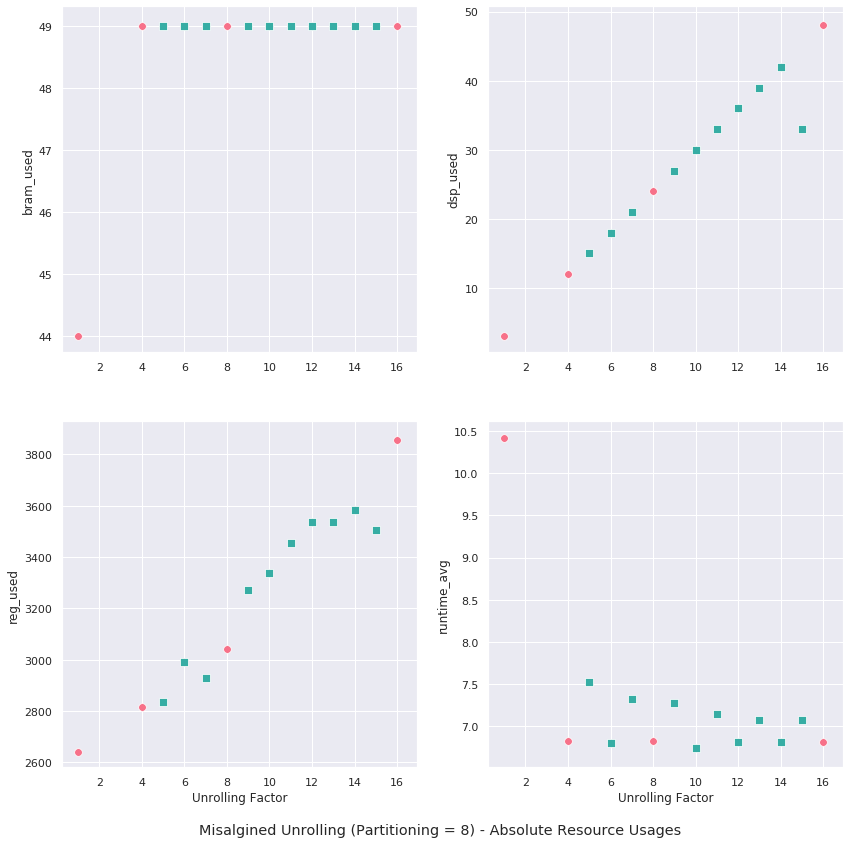

In [35]:
plt.figure()
sns.set()

# Configuration for subplot
cols = 2
rows = int(len(keys) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 14))
pal = sns.color_palette('husl', 8)

for idx, key in enumerate(keys):
    # Get current axes for the subplot
    ax = axes[int(idx / rows), idx % cols]
    # Manually add each point to the current scatter plot.
    # This lets us control the color and shape of point.
    for i in range(len(df['unroll'])):
        x = df['unroll'][i]
        (mark, col) = ('o', pal[0]) if 128 % x == 0 else ('s', pal[4])
        sns.scatterplot(x=[x], y=[df[key][i]], marker=mark, s=20*3, color=col, ax=ax)
        ax.set_ylabel(key)
        
for col in range(cols):
    axes[rows - 1, col].set(xlabel='Unrolling Factor')
    
fig.suptitle('Misalgined Unrolling (Partitioning = 8) - Absolute Resource Usages', y=0.07)

In [36]:
fig.savefig('absolute.png', dpi=300)